<a href="https://colab.research.google.com/github/mahdid-lilia/SIC_Samsung-Innovation-Campus-AI-Course/blob/main/Categorical_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0310

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Classification with KNN:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline
from sklearn.metrics import classification_report


#### 1.1. Read in data:

The data and explanation can be found [here](https://www.kaggle.com/c/titanic/data) (requires sign in).

In [ ]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own.   

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_set/data_titanic.csv', header='infer')

In [ ]:
df.shape


(891, 12)

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 1.2. Missing value processing: 

In [ ]:
# Check for the missing values.
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Fill the missing values in the Age variable.
n = df.shape[0]
Age = []                                                               # A temporary list.
for i in range(n):
    if np.isnan(df.Age[i]):
        if ('Mr' in df.Name[i]) or ('Mrs' in df.Name[i]) :
            Age.append(30)                                             # If Mr. or Mrs. in the name, then fill with 30.
        else:
            Age.append(10)                                             # Likely a child. So, fill with 10.
    else:
        Age.append(df.Age[i])
df.Age = pd.Series(Age)

In [ ]:
# We will drop some columns.
df = df.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'])
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [ ]:
# Delete the rest of missing values.
df=df.dropna(axis=0)
df.shape

(889, 7)

In [ ]:
df.shape

(889, 7)

#### 1.3. Exploratory data analysis:

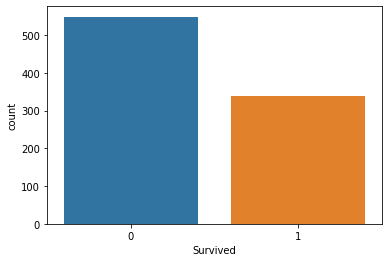

In [ ]:
# The frequency table of Survived.
sns.countplot('Survived',data=df)
plt.show()

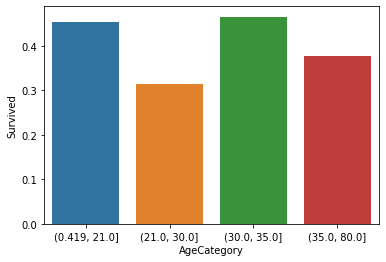

In [ ]:
# Survival rate by Age category. 
df['AgeCategory'] = pd.qcut(df.Age,4)                   # Using quantiles cut into 4 intervals.
sns.barplot(x='AgeCategory',y='Survived', ci=None, data=df)
plt.show()

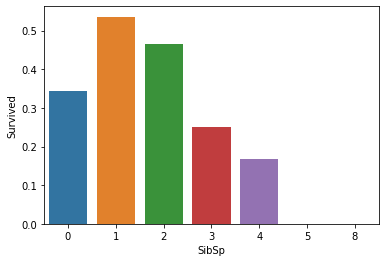

In [ ]:
# Survival rate by SibSp category. 
sns.barplot(x='SibSp', y='Survived', ci=None, data=df)
plt.show()

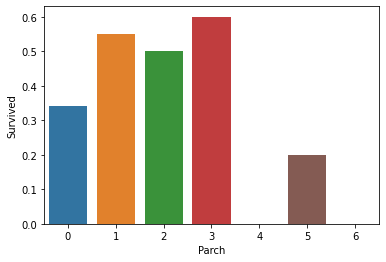

In [ ]:
# Survival rate by Parch.
sns.barplot(x='Parch', y='Survived', ci=None, data=df)
plt.show()

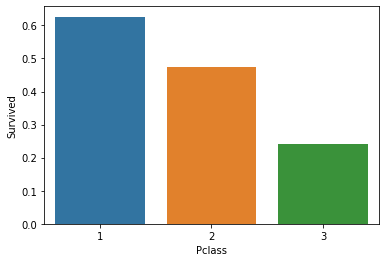

In [ ]:
# Survival rate by Pclass.
sns.barplot(x='Pclass', y='Survived', ci=None, data=df)
plt.show()

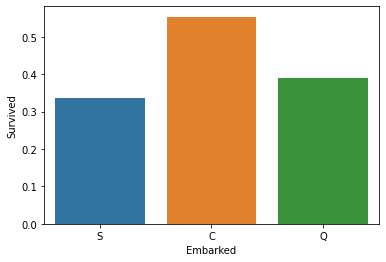

In [ ]:
# Survival rate by Embarked.
sns.barplot(x='Embarked', y='Survived', ci=None, data=df)
plt.show()

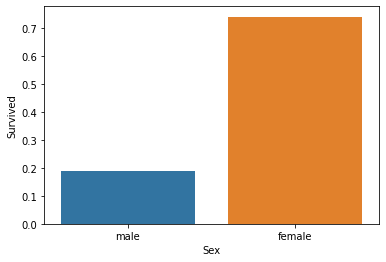

In [ ]:
# Survival rate by Sex.
sns.barplot(x='Sex', y='Survived', ci=None,  data=df)
plt.show()

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeCategory
0,0,3,male,22.0,1,0,S,"(21.0, 30.0]"
1,1,1,female,38.0,1,0,C,"(35.0, 80.0]"
2,1,3,female,26.0,0,0,S,"(21.0, 30.0]"
3,1,1,female,35.0,1,0,S,"(30.0, 35.0]"
4,0,3,male,35.0,0,0,S,"(30.0, 35.0]"
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,"(21.0, 30.0]"
887,1,1,female,19.0,0,0,S,"(0.419, 21.0]"
888,0,3,female,10.0,1,2,S,"(0.419, 21.0]"
889,1,1,male,26.0,0,0,C,"(21.0, 30.0]"


#### 1.4. Feature engineering:

In [ ]:
#it's preferable to do our preprocesssing data after splitin the data, 

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
# df[['Sex']]= encoder.fit_transform(df['Sex'])
# df['Embarked']= encoder.fit_transform(df['Embarked'])
# df['AgeCategory']= encoder.fit_transform(df['AgeCategory'])
# df

#### 1.5. Naive bayes train and test:

In [ ]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(622, 7)
(267, 7)
(622,)
(267,)


In [ ]:
# label encoding 
encoder = LabelEncoder()
X_train['Pclass'] = encoder.fit_transform(X_train['Pclass'])
X_test['Pclass'] = encoder.transform(X_test['Pclass'])
encoder = LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = encoder.transform(X_test['Sex'])
encoder = LabelEncoder()
X_train['Embarked'] = encoder.fit_transform(X_train['Embarked'])
X_test['Embarked'] = encoder.transform(X_test['Embarked'])
encoder = LabelEncoder()
X_train['AgeCategory'] = encoder.fit_transform(X_train['AgeCategory'])
X_test['AgeCategory'] = encoder.transform(X_test['AgeCategory'])


In [ ]:
# set alpha to 1
from sklearn.metrics import f1_score
# train the model
model= CategoricalNB(alpha=1.0)
model.fit(X_train.values, Y_train.values)

CategoricalNB()

In [ ]:
# test 
Y_pred = model.predict(X_test.values)
# classification report 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       169
           1       0.69      0.79      0.74        98

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.80       267



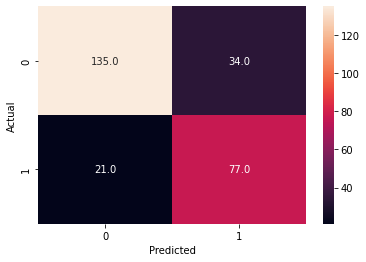

In [ ]:
# confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt=".1f")

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       169
           1       0.68      0.76      0.71        98

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.77       267
weighted avg       0.79      0.78      0.78       267



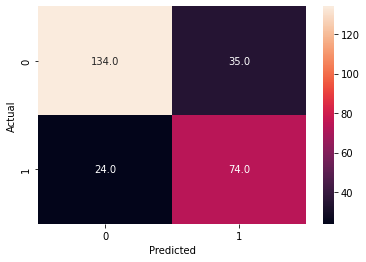

In [ ]:
# set alpha to 0.5
from sklearn.metrics import f1_score
# train the model
model= CategoricalNB(alpha=0.1)
model.fit(X_train.values, Y_train.values)
# test 
Y_pred = model.predict(X_test.values)
# classification report 
print(classification_report(Y_test,Y_pred))
# confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt=".1f")

In [ ]:

# print from the model category_count_
print(model.category_count_)
# print from the model class_count_
print(model.class_count_)
# print from the model n_categories_
print(model.n_categories_)
# print feature_log_prob_
print(model.feature_log_prob_)

[array([[ 51.,  62., 267.],
       [ 93.,  58.,  91.]]), array([[ 52., 328.],
       [159.,  83.]]), array([[ 0.,  1.,  7.,  1.,  2.,  0.,  0.,  1.,  2.,  5., 11.,  1.,  0.,
         0.,  3.,  0.,  9.,  7., 11., 12.,  9., 12., 12.,  6., 11., 11.,
         8.,  5., 11.,  7., 88.,  7.,  7.,  6.,  7.,  5.,  8.,  3.,  6.,
         6.,  7.,  2.,  5.,  4.,  1.,  7.,  2.,  6.,  3.,  1.,  4.,  2.,
         3.,  0.,  3.,  1.,  1.,  2.,  2.,  1.,  2.,  2.,  1.,  0.,  2.,
         3.,  1.,  0.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 5.,  4.,  1.,  4.,  5.,  4.,  2.,  1.,  2.,  1., 17.,  1.,  1.,
         0.,  1.,  1.,  5.,  4.,  6.,  9.,  3.,  4.,  8.,  5., 12.,  3.,
         6.,  6.,  5.,  8., 29.,  5.,  7.,  6.,  3.,  7.,  8.,  0.,  4.,
         4.,  4.,  2.,  3.,  0.,  2.,  4.,  0.,  0.,  3.,  4.,  2.,  2.,
         2.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,

#### 1.6. choosing the right alpha

#### 1.7. Naive bayes hyperparameter optimization:

In [ ]:
# Parameter grid.
alpha_grid = np.arange(1,51,1)
parameters = {'alpha':alpha_grid}

In [ ]:
# Optimize the k.
gridCV = GridSearchCV(CategoricalNB(), parameters, cv=15, n_jobs = -1,scoring=f1_score)      

# "n_jobs = -1" means "use all the CPU cores".
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['alpha']
print("Best alpha : " + str(best_k))

Best alpha : 1


In [ ]:
# train and Test with the best alpha
from sklearn.metrics import f1_score
# train the model
model= CategoricalNB(alpha=1.0)
model.fit(X_train.values, Y_train.values)
# test 
Y_pred = model.predict(X_test.values)
# classification report 
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.87      0.80      0.83       169
           1       0.69      0.79      0.74        98

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.80       267



In [ ]:

# print from the model category_count_
print(model.category_count_)
# print from the model class_count_
print(model.class_count_)
# print from the model n_categories_
print(model.n_categories_)
# print feature_log_prob_
print(model.feature_log_prob_)

[array([[ 51.,  62., 267.],
       [ 93.,  58.,  91.]]), array([[ 52., 328.],
       [159.,  83.]]), array([[ 0.,  1.,  7.,  1.,  2.,  0.,  0.,  1.,  2.,  5., 11.,  1.,  0.,
         0.,  3.,  0.,  9.,  7., 11., 12.,  9., 12., 12.,  6., 11., 11.,
         8.,  5., 11.,  7., 88.,  7.,  7.,  6.,  7.,  5.,  8.,  3.,  6.,
         6.,  7.,  2.,  5.,  4.,  1.,  7.,  2.,  6.,  3.,  1.,  4.,  2.,
         3.,  0.,  3.,  1.,  1.,  2.,  2.,  1.,  2.,  2.,  1.,  0.,  2.,
         3.,  1.,  0.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 5.,  4.,  1.,  4.,  5.,  4.,  2.,  1.,  2.,  1., 17.,  1.,  1.,
         0.,  1.,  1.,  5.,  4.,  6.,  9.,  3.,  4.,  8.,  5., 12.,  3.,
         6.,  6.,  5.,  8., 29.,  5.,  7.,  6.,  3.,  7.,  8.,  0.,  4.,
         4.,  4.,  2.,  3.,  0.,  2.,  4.,  0.,  0.,  3.,  4.,  2.,  2.,
         2.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rsCV = RandomizedSearchCV(CategoricalNB(), parameters, cv=15, n_jobs = -1,scoring=f1_score)#cv=5 , scoring =f1_score

rsCV.fit(X_train, Y_train)
best_alpha = rsCV.best_params_['alpha']
print(best_alpha)

19


In [ ]:
# set alpha to 0.5
from sklearn.metrics import f1_score
# train the model
model= CategoricalNB(alpha=19)
model.fit(X_train.values, Y_train.values)
# test 
Y_pred = model.predict(X_test.values)
# classification report 
print(classification_report(Y_test,Y_pred))
# print from the model category_count_
# print from the model class_count_
# print from the model n_categories_
# print feature_log_prob_

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       169
           1       0.74      0.71      0.73        98

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

